In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
from matplotlib.animation import FuncAnimation
# Import slider package
from matplotlib.widgets import Slider

In [9]:
%matplotlib inline

In [10]:
def stripe2(mask, frame, frame2):
    returned_vector = np.sum(mask[:,:,2], axis = 0)
    return returned_vector, mask

In [11]:
# This drives the program into an infinite loop.
counter = 0
time_vector = []
magnitude2 = []
mag = []
all_magnitudes_2 = []
cap = cv2.VideoCapture('../Desktop/edited_sid_clip.mp4')
while(1):
    time_vector.append(counter)
    # Captures the live stream frame-by-frame
    ret, frame = cap.read()
    # Converts images from BGR to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    blue_lower = np.array([45, 0, 0], np.uint8)
    blue_upper = np.array([160, 255, 255], np.uint8)
    mask = cv2.inRange(hsv, blue_lower, blue_upper)

    res = cv2.bitwise_and(frame,frame, mask= mask)
    mag, temp_mask = stripe2(res[100:500,400:800,:], hsv, frame)
    all_magnitudes_2.append(mag)
#     cv2.imshow('frame',frame)
#     cv2.imshow('mask',mask)
#     cv2.imshow('res',res)
    counter += 1
    # This displays the frame, mask
    # and res which we created in 3 separate windows.
    k = cv2.waitKey(1) & 0xFF
    #print(k)
    if k == 27:
        break
    if counter == 700:
        break
 
# Destroys all of the HighGUI windows.
print(counter)
# cv2.destroyAllWindows()
cv2.destroyWindow('frame')
cv2.destroyWindow('res')
cv2.destroyWindow('mask')
cv2.waitKey(1)
# release the captured frame
cap.release()

700


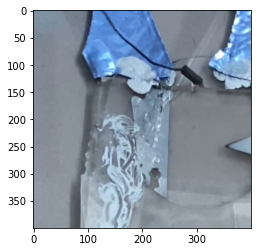

In [12]:
plt.imshow(mask)
plt.imshow(frame[100:500,400:800,:])
plt.show()

In [13]:
all_magnitudes_2 /= np.amax(all_magnitudes_2)

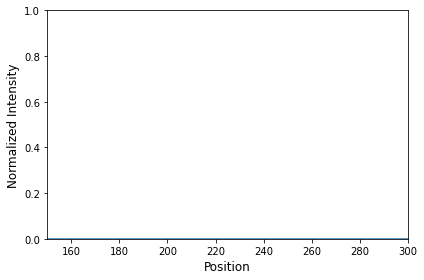

In [14]:
# Create figure and add axes
fig = plt.figure(figsize=(6, 4))
ax = plt.axes(xlim = (150,300),ylim = (0,1))
ax.set_xlabel('Position', fontsize = 12)
ax.set_ylabel('Normalized Intensity', fontsize = 12)

intensity, = ax.plot([], [], linewidth=2.5)
cur_time = ax.text(1, 1, '', ha='right', va='top', fontsize=12)
def init():
    intensity.set_data([],[])
    return intensity, cur_time

def animate(i):
    x = np.arange(400)
    y = all_magnitudes_2[i]
    intensity.set_data(x, y)
    return intensity, cur_time
# Create animation
ani = FuncAnimation(fig=fig, func=animate, init_func = init, frames=int(len(all_magnitudes_2)), interval=250, repeat = True)
#ani.save('AnimatedPlot.gif', writer='imagemagick', fps=2)

# Ensure the entire plot is visible
fig.tight_layout()
from IPython.display import HTML
HTML(ani.to_jshtml())